In [5]:
from datetime import date
import statistics

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.tafble as table



In [82]:
repos = pd.read_csv("../variable_collection/output/repositories_filtered_2021-05-20.csv")
how_fair_is = pd.read_csv("../variable_collection/output/repositories_howfairis.csv")
languages = pd.read_csv("../variable_collection/output/languages_2021-05-22.csv")
contributors = pd.read_csv("../variable_collection/output/contributors_2021-06-11.csv")
topics = pd.read_csv("../variable_collection/output/topics_2021-06-04.csv")

## Datasets

Using the github API and the Howfairis software, we collected data on the repositories, their FAIRness, the languages used in the repository, the amount of contributors for each repository and the topics mentoined in each repository. 

The Howfairis software gives  boolean value on five measures of FAIRness for each repository. These five measures consist of having a repository (which is always True for our dataset), having a license, being available in a registry, allowing citation of the software and following the FAIR software quality checklist. Below, the first five rows of the datasets are displayed. 

In [65]:
repos.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,disabled,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,False,0,NaN,[],0,0,0,master,NaN,1.0
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,False,0,NaN,[],0,0,2,master,NaN,1.0
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,False,0,MIT License,[],0,0,1,master,NaN,1.0
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,False,0,NaN,[],0,0,0,master,NaN,1.0
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,False,0,NaN,[],0,0,0,master,NaN,1.0


In [66]:
how_fair_is.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,watchers,default_branch,permissions,score,howfairis_repository,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist,how_fair_sum_scores
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,master,NaN,1.0,True,False,False,False,False,1
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,2,master,NaN,1.0,True,False,False,False,False,1
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,1,master,NaN,1.0,True,True,False,False,False,2
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,master,NaN,1.0,True,False,False,False,False,1
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,master,NaN,1.0,True,False,False,False,False,1


In [67]:
languages.head()

,html_url_repository,language,num_chars,how_fair_sum_scores
0,https://github.com/M-thieu/fastlogitME,R,9917,1
1,https://github.com/bricker0/Seattle-Feature-Se...,HTML,7296,1
2,https://github.com/bricker0/MyLocation,Swift,22906,2
3,https://github.com/bricker0/Leaflet_2017,HTML,5028,1
4,https://github.com/bricker0/BasicWebsite,CSS,922,1


In [11]:
contributors.head()

,html_url_repository,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,site_admin,contributions
0,https://github.com/M-thieu/fastlogitME,M-thieu,20308204,MDQ6VXNlcjIwMzA4MjA0,https://avatars.githubusercontent.com/u/203082...,NaN,https://api.github.com/users/M-thieu,https://github.com/M-thieu,https://api.github.com/users/M-thieu/followers,https://api.github.com/users/M-thieu/following...,https://api.github.com/users/M-thieu/gists{/gi...,https://api.github.com/users/M-thieu/starred{/...,https://api.github.com/users/M-thieu/subscript...,https://api.github.com/users/M-thieu/orgs,https://api.github.com/users/M-thieu/repos,https://api.github.com/users/M-thieu/events{/p...,https://api.github.com/users/M-thieu/received_...,User,False,3
1,https://github.com/bricker0/Seattle-Feature-Se...,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,15
2,https://github.com/bricker0/choropleth_map,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,46
3,https://github.com/bricker0/Live_Earthquake_Feed,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,1
4,https://github.com/bricker0/MyLocation,bricker0,1919662,MDQ6VXNlcjE5MTk2NjI=,https://avatars.githubusercontent.com/u/191966...,NaN,https://api.github.com/users/bricker0,https://github.com/bricker0,https://api.github.com/users/bricker0/followers,https://api.github.com/users/bricker0/followin...,https://api.github.com/users/bricker0/gists{/g...,https://api.github.com/users/bricker0/starred{...,https://api.github.com/users/bricker0/subscrip...,https://api.github.com/users/bricker0/orgs,https://api.github.com/users/bricker0/repos,https://api.github.com/users/bricker0/events{/...,https://api.github.com/users/bricker0/received...,User,False,2


In [12]:
topics.head()

,html_url_repository,topic
0,https://github.com/cjvanlissa/COVID19_metadata,ncov
1,https://github.com/cjvanlissa/COVID19_metadata,coronavirus
2,https://github.com/cjvanlissa/COVID19_metadata,covid
3,https://github.com/cjvanlissa/COVID19_metadata,sars-cov-2
4,https://github.com/UUDigitalHumanitieslab/texc...,python


In [13]:
print("The repository data from Github contains the following columns:")
print(repos.columns)

The repository data from Github contains the following columns:
Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_i

## Different licenses 

A license is important because it shows that people have permission to use and modify your code. In our dataset,the most common one is MIT license, followed by GNU General Public license.  The plot below shows the value count of different licenses. 


<ipython-input-13-d143c0bf0bc1>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


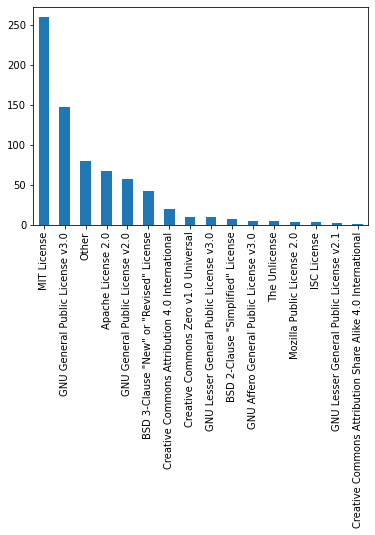

In [13]:
#licences
repos["license"].value_counts().plot(kind='bar')
plt.tight_layout()
plt.savefig("licenses.png" ,bbox_inches="tight")

Below, the propotion of licenses compared to the total is shown, with their absolute count shown below that. . 

In [76]:

for key,i in zip(repos["license"].value_counts().keys(), repos["license"].value_counts()):
    print(key + '{}: {:.3f}'.format(key, i/sum(repos["license"].value_counts())))
    #print(i/sum(repos["license"].value_counts()))


MIT LicenseMIT License: 0.364
GNU General Public License v3.0GNU General Public License v3.0: 0.206
OtherOther: 0.111
Apache License 2.0Apache License 2.0: 0.094
GNU General Public License v2.0GNU General Public License v2.0: 0.080
BSD 3-Clause "New" or "Revised" LicenseBSD 3-Clause "New" or "Revised" License: 0.059
Creative Commons Attribution 4.0 InternationalCreative Commons Attribution 4.0 International: 0.027
Creative Commons Zero v1.0 UniversalCreative Commons Zero v1.0 Universal: 0.013
GNU Lesser General Public License v3.0GNU Lesser General Public License v3.0: 0.013
BSD 2-Clause "Simplified" LicenseBSD 2-Clause "Simplified" License: 0.010
GNU Affero General Public License v3.0GNU Affero General Public License v3.0: 0.006
The UnlicenseThe Unlicense: 0.006
Mozilla Public License 2.0Mozilla Public License 2.0: 0.004
ISC LicenseISC License: 0.004
GNU Lesser General Public License v2.1GNU Lesser General Public License v2.1: 0.003
Creative Commons Attribution Share Alike 4.0 Interna

In [14]:
repos["license"].value_counts()

MIT License                                                   259
GNU General Public License v3.0                               147
Other                                                          79
Apache License 2.0                                             67
GNU General Public License v2.0                                57
BSD 3-Clause "New" or "Revised" License                        42
Creative Commons Attribution 4.0 International                 19
Creative Commons Zero v1.0 Universal                            9
GNU Lesser General Public License v3.0                          9
BSD 2-Clause "Simplified" License                               7
GNU Affero General Public License v3.0                          4
The Unlicense                                                   4
Mozilla Public License 2.0                                      3
ISC License                                                     3
GNU Lesser General Public License v2.1                          2
Creative C

In [15]:
percentage_license = int(repos["license"].isna().value_counts()[1]/len(repos)* 100)
print("{} % of repositories have any kind of license on their page ".format(percentage_license))

47 % of repositories have any kind of license on their page 


## Repositories mentoining Open Science

Because this project is related to open science, we wanted to investigate how many repositories mentoin open science in their description

In [85]:
open_count = 0
for description in repos["description"]:
    if "open" in str(description).lower():
        #print(description)
        open_count +=1
print("{} repositories contain the word 'open', often related to either open data or open source projects".format(open_count))

17 repositories contain the word 'open', often related to either open data or open source projects


## Languages



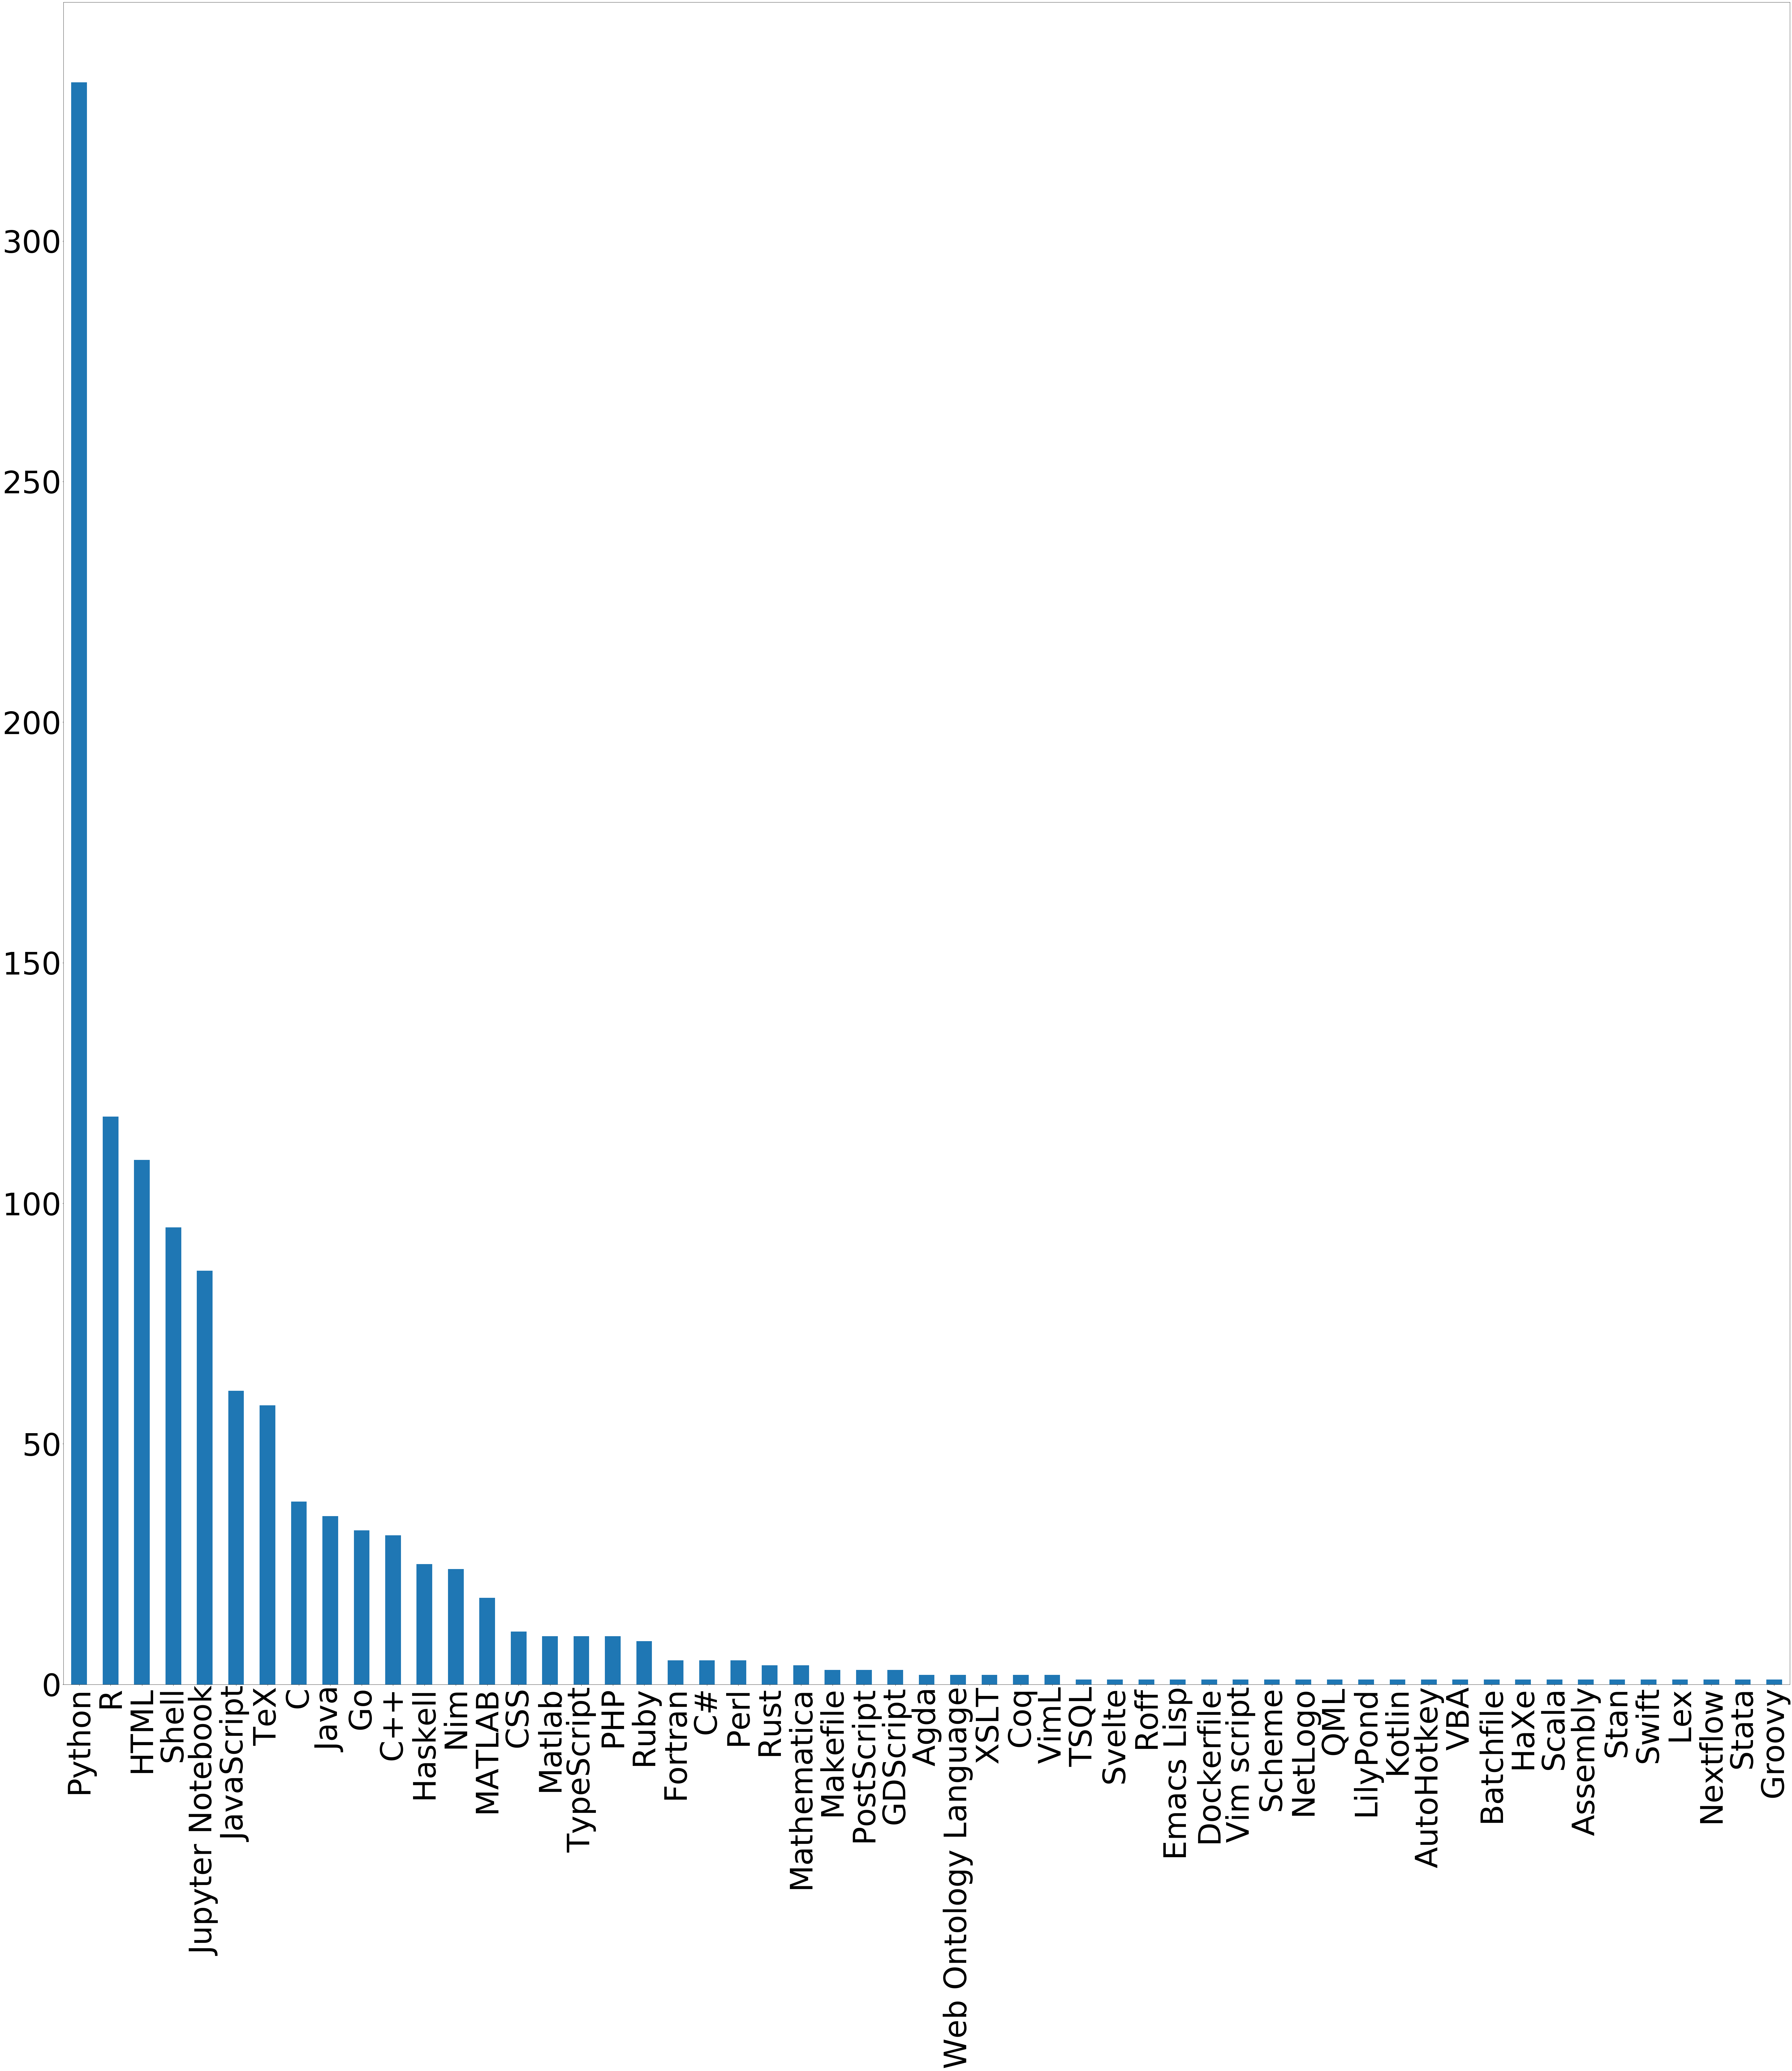

In [17]:
repos["language"].value_counts().plot(kind='bar', figsize = (100,100), fontsize = 100)
plt.savefig('language_plot.png')

In [21]:
sum_five = 0
times = 0
for key,i in zip(repos["language"].value_counts().keys(), repos["language"].value_counts()):
    print(key)
    print(i/sum(repos["language"].value_counts()))
    sum_five += i/sum(repos["language"].value_counts())
    times += 1
    if times ==10:
        break
    
    
print(sum_five)

Python
0.2826825127334465
R
0.100169779286927
HTML
0.09252971137521222
Shell
0.08064516129032258
Jupyter Notebook
0.0730050933786078
JavaScript
0.05178268251273345
TeX
0.04923599320882852
C
0.03225806451612903
Java
0.029711375212224108
Go
0.027164685908319185
0.8191850594227504


In [18]:
from collections import Counter 

topic_counter = Counter()
for topics in repos['topics']:
    
    topics = eval(topics)
    if len(topics) > 0:
        #print(topics)
        for topic in topics:
            #print(topic)
            topic_counter[topic] += 1


In [19]:
topic_counter.most_common()

[('genomics', 26),
 ('utrecht-university', 20),
 ('python', 19),
 ('yoda', 16),
 ('bioinformatics', 15),
 ('stan', 15),
 ('irods', 11),
 ('nim-lang', 11),
 ('php', 10),
 ('james-server', 10),
 ('r', 9),
 ('r-package', 9),
 ('machine-learning', 8),
 ('codeigniter', 8),
 ('nim', 8),
 ('bayesian', 8),
 ('growth-curves', 8),
 ('fiji-plugin', 7),
 ('growth-charts', 7),
 ('asreview', 6),
 ('bayesian-data-analysis', 6),
 ('anthropometry', 6),
 ('plotting', 5),
 ('golang', 5),
 ('dataset', 5),
 ('netherlands', 5),
 ('systematic-reviews', 5),
 ('dutch', 5),
 ('vcf', 5),
 ('structural-variation', 5),
 ('high-throughput-sequencing', 5),
 ('microscopy', 5),
 ('imagej', 5),
 ('imagej-plugins', 5),
 ('bayesian-inference', 5),
 ('bayesian-statistics', 5),
 ('mcmc', 5),
 ('mice', 5),
 ('nodejs', 5),
 ('eida', 5),
 ('visualization', 4),
 ('plot', 4),
 ('python-library', 4),
 ('record-linkage', 4),
 ('entity-resolution', 4),
 ('deduplication', 4),
 ('open-data', 4),
 ('deep-learning', 4),
 ('systematic-

## number of top contributors


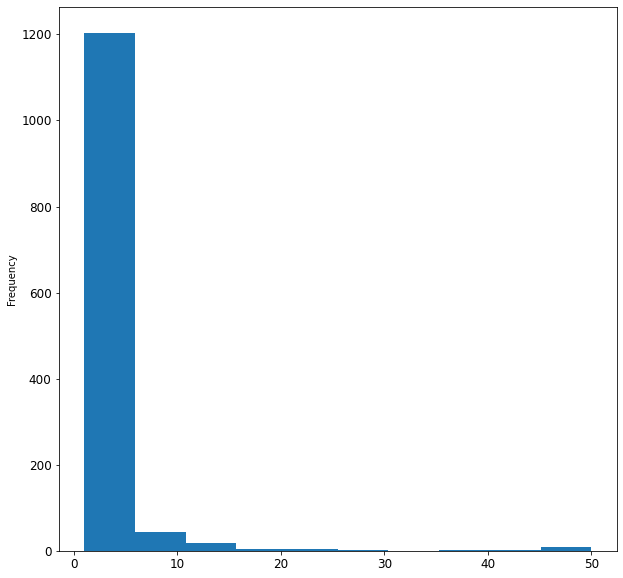

In [83]:
contributors['html_url_repository'].value_counts().plot(kind = 'hist' ,x = 'contributors', figsize = (10,10), fontsize = 12)
plt.savefig('contributors.png')


In [84]:
contributors['html_url_repository'].value_counts().nlargest(20, keep = 'all')


https://github.com/aldertzomer/Microbial-Genomics-2019        50
https://github.com/stan-dev/rstan                             50
https://github.com/stan-dev/math                              50
https://github.com/stan-dev/stan                              50
https://github.com/aldertzomer/Microbial-Genomics-2020        50
https://github.com/stan-dev/monostan                          50
https://github.com/stan-dev/example-models                    50
https://github.com/stan-dev/docs                              47
https://github.com/leonardovida/gatsby-starter-netlify-cms    43
https://github.com/stan-dev/pystan2                           39
https://github.com/OceanParcels/parcels                       37
https://github.com/stan-dev/cmdstan                           29
https://github.com/stan-dev/cmdstanpy                         29
https://github.com/brentp/cyvcf2                              26
https://github.com/stan-dev/rstanarm                          24
https://github.com/stan-d

In [28]:
contributors.nlargest(16, 'contributions')

,html_url_repository,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,site_admin,contributions
2292,https://github.com/stan-dev/monostan,syclik,425751,MDQ6VXNlcjQyNTc1MQ==,https://avatars.githubusercontent.com/u/425751...,NaN,https://api.github.com/users/syclik,https://github.com/syclik,https://api.github.com/users/syclik/followers,https://api.github.com/users/syclik/following{...,https://api.github.com/users/syclik/gists{/gis...,https://api.github.com/users/syclik/starred{/o...,https://api.github.com/users/syclik/subscriptions,https://api.github.com/users/syclik/orgs,https://api.github.com/users/syclik/repos,https://api.github.com/users/syclik/events{/pr...,https://api.github.com/users/syclik/received_e...,User,False,5532
1975,https://github.com/stan-dev/math,syclik,425751,MDQ6VXNlcjQyNTc1MQ==,https://avatars.githubusercontent.com/u/425751...,NaN,https://api.github.com/users/syclik,https://github.com/syclik,https://api.github.com/users/syclik/followers,https://api.github.com/users/syclik/following{...,https://api.github.com/users/syclik/gists{/gis...,https://api.github.com/users/syclik/starred{/o...,https://api.github.com/users/syclik/subscriptions,https://api.github.com/users/syclik/orgs,https://api.github.com/users/syclik/repos,https://api.github.com/users/syclik/events{/pr...,https://api.github.com/users/syclik/received_e...,User,False,4661
1855,https://github.com/stan-dev/stan,syclik,425751,MDQ6VXNlcjQyNTc1MQ==,https://avatars.githubusercontent.com/u/425751...,NaN,https://api.github.com/users/syclik,https://github.com/syclik,https://api.github.com/users/syclik/followers,https://api.github.com/users/syclik/following{...,https://api.github.com/users/syclik/gists{/gis...,https://api.github.com/users/syclik/starred{/o...,https://api.github.com/users/syclik/subscriptions,https://api.github.com/users/syclik/orgs,https://api.github.com/users/syclik/repos,https://api.github.com/users/syclik/events{/pr...,https://api.github.com/users/syclik/received_e...,User,False,4618
1295,https://github.com/OceanParcels/parcels,erikvansebille,14315062,MDQ6VXNlcjE0MzE1MDYy,https://avatars.githubusercontent.com/u/143150...,NaN,https://api.github.com/users/erikvansebille,https://github.com/erikvansebille,https://api.github.com/users/erikvansebille/fo...,https://api.github.com/users/erikvansebille/fo...,https://api.github.com/users/erikvansebille/gi...,https://api.github.com/users/erikvansebille/st...,https://api.github.com/users/erikvansebille/su...,https://api.github.com/users/erikvansebille/orgs,https://api.github.com/users/erikvansebille/repos,https://api.github.com/users/erikvansebille/ev...,https://api.github.com/users/erikvansebille/re...,User,False,2276
1976,https://github.com/stan-dev/math,stan-buildbot,3512237,MDQ6VXNlcjM1MTIyMzc=,https://avatars.githubusercontent.com/u/351223...,NaN,https://api.github.com/users/stan-buildbot,https://github.com/stan-buildbot,https://api.github.com/users/stan-buildbot/fol...,https://api.github.com/users/stan-buildbot/fol...,https://api.github.com/users/stan-buildbot/gis...,https://api.github.com/users/stan-buildbot/sta...,https://api.github.com/users/stan-buildbot/sub...,https://api.github.com/users/stan-buildbot/orgs,https://api.github.com/users/stan-buildbot/repos,https://api.github.com/users/stan-buildbot/eve...,https://api.github.com/users/stan-buildbot/rec...,User,False,1805
1977,https://github.com/stan-dev/math,rok-cesnovar,28476796,MDQ6VXNlcjI4NDc2Nzk2,https://avatars.githubusercontent.com/u/284767...,NaN,https://api.github.com/users/rok-cesnovar,https://github.com/rok-cesnovar,https://api.github.com/users/rok-cesnovar/foll...,https://api.github.com/users/rok-cesnovar/foll...,https://api.github.com/users/rok-cesnovar/gist...,https://api.github.com/users/rok-cesnovar/star...,https://api.github.com/users/rok-cesnovar/subs...,https://api.github.com/users/rok-cesnovar/o

In [21]:
print('maximum contributors: '+ str(max(contributors['contributions'])))
print('mean contributors: ' + str(statistics.mean(contributors['contributions'])))
print('median contributors: ' + str(statistics.median(contributors['contributions'])))

maximum contributors: 5532
mean contributors: 52.82843472317157
median contributors: 6.0


## most recent commits 

In [22]:
months_ago_most_recent_commit =[]
today = str(date.today())
split_today = today.split('-')
for date_item in repos['updated_at']:
    split_date = date_item.split('-')
    years_ago = int(split_today[0]) - int(split_date[0])
    months_ago = 12 * years_ago + (int(split_today[1]) - int(split_date[1]))
    months_ago_most_recent_commit.append(months_ago)

In [23]:
repos['months_ago_most_recent_commit'] = months_ago_most_recent_commit

In [24]:
repos.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,permissions,score,months_ago_most_recent_commit
0,307429416,MDEwOlJlcG9zaXRvcnkzMDc0Mjk0MTY=,fastlogitME,M-thieu/fastlogitME,False,M-thieu,https://github.com/M-thieu/fastlogitME,Fast but Basic Marginal Effects for Logit Mode...,False,https://api.github.com/repos/M-thieu/fastlogitME,...,0,NaN,[],0,0,0,master,NaN,1.0,8
1,73220408,MDEwOlJlcG9zaXRvcnk3MzIyMDQwOA==,Seattle-Feature-Service,bricker0/Seattle-Feature-Service,False,bricker0,https://github.com/bricker0/Seattle-Feature-Se...,Here I explain how to call Seattle Open Data E...,False,https://api.github.com/repos/bricker0/Seattle-...,...,0,NaN,[],0,0,2,master,NaN,1.0,22
2,259872452,MDEwOlJlcG9zaXRvcnkyNTk4NzI0NTI=,choropleth_map,bricker0/choropleth_map,False,bricker0,https://github.com/bricker0/choropleth_map,How to make a choropleth map using SDG indicat...,False,https://api.github.com/repos/bricker0/chorople...,...,0,MIT License,[],0,0,1,master,NaN,1.0,13
3,112259672,MDEwOlJlcG9zaXRvcnkxMTIyNTk2NzI=,Live_Earthquake_Feed,bricker0/Live_Earthquake_Feed,False,bricker0,https://github.com/bricker0/Live_Earthquake_Feed,Want to make one of those snazzy live Earthqua...,False,https://api.github.com/repos/bricker0/Live_Ear...,...,0,NaN,[],0,0,0,master,NaN,1.0,43
4,51859197,MDEwOlJlcG9zaXRvcnk1MTg1OTE5Nw==,MyLocation,bricker0/MyLocation,False,bricker0,https://github.com/bricker0/MyLocation,Lab 3,False,https://api.github.com/repos/bricker0/MyLocation,...,0,NaN,[],0,0,0,master,NaN,1.0,29


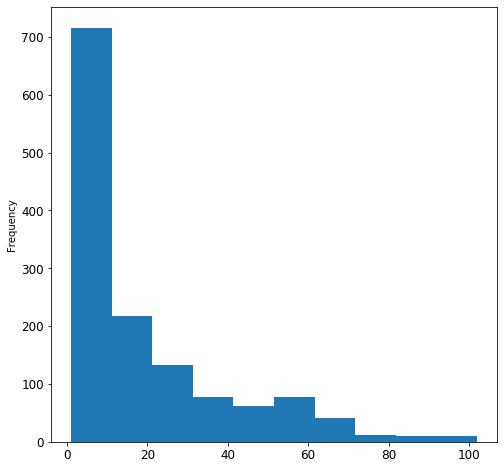

In [102]:
repos['months_ago_most_recent_commit'].plot(kind = 'hist', figsize = (8,8), fontsize = 12) #Add x-axis months ago
plt.savefig('most_recent_commit_months.png')

## Howfairis descriptives and correlations

In [33]:
how_fair_sum_scores = []
for index, row in how_fair_is.iterrows():
    how_fair_is_sum = row['howfairis_repository'] + row['howfairis_license'] +row['howfairis_registry'] + row['howfairis_citation'] + row['howfairis_checklist']
    how_fair_sum_scores.append(how_fair_is_sum)

mean: 1.5966076696165192
median: 2.0


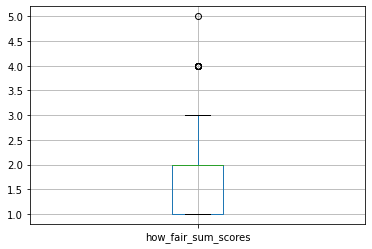

In [34]:
how_fair_is['how_fair_sum_scores'] = how_fair_sum_scores
print("mean: " + str(statistics.mean(how_fair_sum_scores)))
print("median: " + str(statistics.median(how_fair_sum_scores)))
pd.DataFrame((statistics.mean(how_fair_sum_scores), statistics.median(how_fair_sum_scores)),["mean", "median"])
how_fair_is.boxplot(column = 'how_fair_sum_scores')
plt.savefig('howfairissum.png')


In [37]:
correlation_df = pd.DataFrame()

In [38]:
correlation_df['how_fair_sum_scores'] = how_fair_sum_scores
correlation_df['contributions']= contributors['contributions']
correlation_df['months_ago_most_recent_commit'] = repos['months_ago_most_recent_commit']

KeyError: 'months_ago_most_recent_commit'

In [108]:
correlation_df.corr(method='pearson')
#plt.savefig('correlation_howfair_other_continous.png')

,how_fair_sum_scores,contributions,months_ago_most_recent_commit
how_fair_sum_scores,1.000000,0.005683,-0.234263
contributions,0.005683,1.000000,0.025359
months_ago_most_recent_commit,-0.234263,0.025359,1.000000


## Binary correlation plot between howfairis variables

In [83]:
correlation_how_fair_is = pd.DataFrame()

#correlation_how_fair_is['howfairis_repository'] = how_fair_is['howfairis_repository']
correlation_how_fair_is['howfairis_license'] = how_fair_is['howfairis_license']
correlation_how_fair_is['howfairis_registry'] = how_fair_is['howfairis_registry']
correlation_how_fair_is['howfairis_citation'] = how_fair_is['howfairis_citation']
correlation_how_fair_is['howfairis_checklist'] = how_fair_is['howfairis_checklist']



In [84]:
correlation_how_fair_is.corr(method='pearson') #howfairis_repository is all true, so has no variance

,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist
howfairis_license,1.000000,0.090147,0.101205,0.051807
howfairis_registry,0.090147,1.000000,0.077041,0.237944
howfairis_citation,0.101205,0.077041,1.000000,0.125391
howfairis_checklist,0.051807,0.237944,0.125391,1.000000


## Programming language and Howfairis

Different programming languages need different licences. For some languages (e.g. python), these are more complex. How does this influence the HowFairis score?

In [44]:
languages['language'].value_counts()

Python             502
Shell              323
HTML               247
R                  218
JavaScript         149
                  ... 
PLpgSQL              1
Meson                1
Protocol Buffer      1
ShaderLab            1
D                    1
Name: language, Length: 127, dtype: int64

In [40]:
index_how_fair_is = 0
language_how_fair_is_df = []
#get a list with the how-fair-is scores added to the language dataset
for index,row in languages.iterrows():
    if how_fair_is['html_url'][index_how_fair_is] != languages['html_url_repository'][index]:
        index_how_fair_is += 1 
    sum_score = how_fair_is['how_fair_sum_scores'][index_how_fair_is]
    language_how_fair_is_df.append(sum_score)
regression_data_how_fair_is_language = pd.DataFrame()
language_data_dummies = pd.get_dummies(languages['language'])  #one hot-encoding for language dataset
print(language_data_dummies)
regression_data_how_fair_is_language['how_fair_is_sum'] = language_how_fair_is_df
languages['how_fair_sum_scores'] = regression_data_how_fair_is_language #add scores to language dataset

      AMPL  ASP  Ada  Agda  Assembly  AutoHotkey  Awk  Batchfile  C  C#  ...  \
0        0    0    0     0         0           0    0          0  0   0  ...   
1        0    0    0     0         0           0    0          0  0   0  ...   
2        0    0    0     0         0           0    0          0  0   0  ...   
3        0    0    0     0         0           0    0          0  0   0  ...   
4        0    0    0     0         0           0    0          0  0   0  ...   
...    ...  ...  ...   ...       ...         ...  ...        ... ..  ..  ...   
2779     0    0    0     0         0           0    0          0  0   0  ...   
2780     0    0    0     0         0           0    0          0  0   0  ...   
2781     0    0    0     0         0           0    0          0  0   0  ...   
2782     0    0    0     0         0           0    0          1  0   0  ...   
2783     0    0    0     0         0           0    0          0  0   0  ...   

      Vim script  Visual Basic  Vue  We

In [34]:
train_size = int(len(languages) * 0.8) #training size is 2227, testing size is  557
regression_how_fair_is_language_train_X = language_data_dummies[:train_size]
regression_how_fair_is_language_train_y = regression_data_how_fair_is_language['how_fair_is_sum'][:train_size]
regression_how_fair_is_language_test_X = language_data_dummies[train_size:]
regression_how_fair_is_language_test_y = regression_data_how_fair_is_language['how_fair_is_sum'][train_size:]

In [35]:
#train regression
regression_language_how_fair_is = LinearRegression()
regression_language_how_fair_is.fit(regression_how_fair_is_language_train_X, regression_how_fair_is_language_train_y)

# Make predictions using the testing set
language_how_fair_is_y_pred = regression_language_how_fair_is.predict(regression_how_fair_is_language_test_X)

# The coefficients
print('Coefficients: \n', regression_language_how_fair_is.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))


Coefficients: 
 [-5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12  2.36973699e+11 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12  5.02123130e+11
 -3.64583665e+11 -5.83773891e+12 -5.83773891e+12  4.71203800e+11
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12  8.96516328e+10 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12 -5.83773891e+12
 -5.83773891e+12 -5.83773891e+12  2.61110650e-06 -5.83773891e+12
 -5.83773

In [80]:
language_subset = language_data_dummies[['Python', 'Shell', 'R', 'JavaScript', 'HTML']] #top 5 languages


In [81]:
train_size = int(len(language_subset) * 0.8)
regression_how_fair_is_language_train_X = language_subset[:train_size]
regression_how_fair_is_language_train_y = regression_data_how_fair_is_language['how_fair_is_sum'][:train_size]
regression_how_fair_is_language_test_X = language_subset[train_size:]
regression_how_fair_is_language_test_y = regression_data_how_fair_is_language['how_fair_is_sum'][train_size:]

In [82]:
#train regression
regression_language_how_fair_is = LinearRegression()
regression_language_how_fair_is.fit(regression_how_fair_is_language_train_X, regression_how_fair_is_language_train_y)

# Make predictions using the testing set
language_how_fair_is_y_pred = regression_language_how_fair_is.predict(regression_how_fair_is_language_test_X)

# The coefficients
print('Coefficients: \n', regression_language_how_fair_is.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))


Coefficients: 
 [-0.00806049  0.04545234 -0.01923682 -0.04352009 -0.0493532 ]
Mean squared error: 0.47
Coefficient of determination: 0.00


## Analysis of high howfairis scores 

Per language
Per low/high contributors
Check out github pages manually as well 
How to translate pages that do well to concrete tips and advice 

In [44]:
how_fair_is_high_scores = how_fair_is[how_fair_is['how_fair_sum_scores'] > 3]
how_fair_is_high_scores_per_language = languages[languages['how_fair_sum_scores'] > 3]


In [46]:
how_fair_is_high_scores

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,watchers,default_branch,permissions,score,howfairis_repository,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist,how_fair_sum_scores
15,233225757,MDEwOlJlcG9zaXRvcnkyMzMyMjU3NTc=,worcs,cjvanlissa/worcs,False,cjvanlissa,https://github.com/cjvanlissa/worcs,Rstudio project template and convenience funct...,False,https://api.github.com/repos/cjvanlissa/worcs,...,48,master,NaN,1.0,True,True,True,False,True,4
19,154496783,MDEwOlJlcG9zaXRvcnkxNTQ0OTY3ODM=,bain,cjvanlissa/bain,False,cjvanlissa,https://github.com/cjvanlissa/bain,Bayes Factors for Informative Hypotheses,False,https://api.github.com/repos/cjvanlissa/bain,...,3,master,NaN,1.0,True,True,True,False,True,4
175,44471657,MDEwOlJlcG9zaXRvcnk0NDQ3MTY1Nw==,recordlinkage,J535D165/recordlinkage,False,J535D165,https://github.com/J535D165/recordlinkage,A toolkit for record linkage and duplicate det...,False,https://api.github.com/repos/J535D165/recordli...,...,546,master,NaN,1.0,True,True,True,True,False,4
191,164874894,MDEwOlJlcG9zaXRvcnkxNjQ4NzQ4OTQ=,asreview,asreview/asreview,False,asreview,https://github.com/asreview/asreview,Active learning for systematic reviews,False,https://api.github.com/repos/asreview/asreview,...,245,master,NaN,1.0,True,True,False,True,True,4
239,46131212,MDEwOlJlcG9zaXRvcnk0NjEzMTIxMg==,grlc,CLARIAH/grlc,False,CLARIAH,https://github.com/CLARIAH/grlc,grlc builds Web APIs using shared SPARQL queries,False,https://api.github.com/repos/CLARIAH/grlc,...,93,master,NaN,1.0,True,True,True,True,False,4
1059,256566641,MDEwOlJlcG9zaXRvcnkyNTY1NjY2NDE=,notebooks,puregome/notebooks,False,puregome,https://github.com/puregome/notebooks,Notebooks of the PuReGoMe Project of the Nethe...,False,https://api.github.com/repos/puregome/notebooks,...,1,master,NaN,1.0,True,True,True,True,True,5
1157,27217350,MDEwOlJlcG9zaXRvcnkyNzIxNzM1MA==,pdb-tools,haddocking/pdb-tools,False,haddocking,https://github.com/haddocking/pdb-tools,A dependency-free cross-platform swiss army kn...,False,https://api.github.com/repos/haddocking/pdb-tools,...,115,master,NaN,1.0,True,True,True,True,False,4
1302,353137452,MDEwOlJlcG9zaXRvcnkzNTMxMzc0NTI=,childdevdata,D-score/childdevdata,False,D-score,https://github.com/D-score/childdevdata,Child Development Data,False,https://api.github.com/repos/D-score/childdevdata,...,0,master,NaN,1.0,True,True,True,True,False,4


In [58]:
how_fair_is_high_scores_per_language

,html_url_repository,language,num_chars,how_fair_sum_scores
15,https://github.com/cjvanlissa/gitbook-demo,CSS,2615,4
19,https://github.com/cjvanlissa/meta_workshop,TeX,132829,4
368,https://github.com/J535D165/recordlinkage,Python,484057,4
369,https://github.com/J535D165/recordlinkage,C,1832,4
370,https://github.com/J535D165/recordlinkage,C++,524,4
396,https://github.com/asreview/asreview,JavaScript,228644,4
397,https://github.com/asreview/asreview,HTML,1743,4
398,https://github.com/asreview/asreview,CSS,1348,4
399,https://github.com/asreview/asreview,Dockerfile,248,4
400,https://github.com/asreview/asreview,Shell,65,4


## Re-use of other projects and articles

Are there competitors?
How do they relate to each other?